In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("translated.csv")

In [3]:
df.head()

,Artist,Song,Translated_Lyrics
0,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՀԱ ԵՎ ՎԵՐՋ,Here is an end\n\r\nEnd of paragraphs and last...
1,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՄԵՆԸ ՁԵԶ,Large-scale and wonderful temples\n\r\nAnd the...
2,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՆԱՌԱԿ ՈՐԴՈՒ ՎԵՐԱԴԱՐՁԸ,When like a prodigal son\n\r\nBecome your own ...
3,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՇԽԱՐՀԻ ՑԱՎՈՎ,My heart with Kariy's world pain\n\r\nHow much...
4,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՌԱՋ ԳԻՏԵԻ,I was known before\n\r\nWhat people would be a...


In [4]:
df["Artist"].value_counts()

ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ     85
ԿՈՄԻՏԱՍ               64
ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ        50
Harout Pamboukjian    40
Misho                 29
Լիլիթ Հովհաննիսյան    27
Սիրուշո               27
Հայկ Հակոբյան         25
Arsen Safaryan        24
Razmik Amyan          23
Silva Hakobyan        20
Միհրան Ծառուկյան      19
Aram MP3              18
HT Hayko              16
ՍԱՅԱԹ-ՆՈՎԱ            16
Mi Qani Hogi          16
Անդրե                 12
Empyray               11
Arame                 11
 Lav Eli              10
Name: Artist, dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.shape

(506, 3)

In [7]:
df['Translated_Lyrics'] = df['Translated_Lyrics'].astype(str)

In [8]:
from langdetect import detect_langs

def get_eng_prob(text):
    detections = detect_langs(text)
    for detection in detections:
        if detection.lang == 'en':
            return detection.prob
    return 0

df['en_prob'] = df['Translated_Lyrics'].map(get_eng_prob)

print('Number of english songs: {}'.format(sum(df['en_prob'] >= 0.5)))
print('Number of non-english songs: {}'.format(sum(df['en_prob'] < 0.5)))

Number of english songs: 502
Number of non-english songs: 4


In [9]:
df = df.loc[df['en_prob'] >= 0.5]

In [10]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df['tokens'] = df['Translated_Lyrics'].map(tokenizer.tokenize)

print(df['tokens'].iloc[0])

['Here', 'is', 'an', 'end', 'End', 'of', 'paragraphs', 'and', 'lasting', 'As', 'a', 'last', 'closed', 'page', 'And', 'no', 'return', 'already', 'Oh', 'native', 'bugs', 'You', 'my', 'last', 'Last', 'Prayer', 'Suburbs', 'of', 'prison', 'psyche', 'Chain', 'and', 'solo', 'Here', 'And', 'the', 'end', 'In', 'the', 'heart', 'of', 'a', 'powerless', 'cry', 'Oh', 'unfinished', 'my', 'song', 'You', 'my', 'last', 'capital', 'Now', 'we', 'believe', 'Where', 'is', 'the', 'Spirit', 's', 'Church', 'We', 'won', 'the', 'war', 'But', 'it', 'turns', 'out', 'that', 'we', 'lost', 'Here', 'And', 'the', 'end', 'Tell', 'me', 'a', 'voice', 'from', 'the', 'depth', 'Is', 'the', 'mask', 'of', 'the', 'mask', 'now', 'speaks', 'Which', 'puppet', 'is', 'the', 'crowd', 'The', 'song', 'is', 'the', 'arrow', 'of', 'freedom', 'And', 'the', 'spear', 'of', 'myth', 'Bel', 'Joschin', 'Hayk', 'won', 'Or', 'the', 'opposite', 'of', 'probably', 'And', 'the', 'pages', 'close', 'the', 'myth', 'tired', 'Stone', 'Statue', 'History', '

In [11]:
stemmer = nltk.stem.porter.PorterStemmer()

In [12]:
a= {}
token_count = 0
for lst in df['tokens']:
    # iterate through all tokens of song
    for token in lst:
        token_count += 1
        # check if token is in dictionary
        if token not in a:
            # add token to dictionary
            a[token] = stemmer.stem(token)
            
df['Ergi Barer'] = df['tokens'].map(lambda lst: [a[token] for token in lst])

print('# of words: {}'.format(token_count))
print('# of unique words: {}'.format(len(a.keys())))
print('# of unique word roots: {}'.format(len(set(a.values()))))

# of words: 89262
# of unique words: 8805
# of unique word roots: 5808


In [13]:
df

,Artist,Song,Translated_Lyrics,en_prob,tokens,Ergi Barer
0,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՀԱ ԵՎ ՎԵՐՋ,Here is an end\n\r\nEnd of paragraphs and last...,0.999996,"[Here, is, an, end, End, of, paragraphs, and, ...","[here, is, an, end, end, of, paragraph, and, l..."
1,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՄԵՆԸ ՁԵԶ,Large-scale and wonderful temples\n\r\nAnd the...,0.999998,"[Large, scale, and, wonderful, temples, And, t...","[larg, scale, and, wonder, templ, and, the, pr..."
2,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՆԱՌԱԿ ՈՐԴՈՒ ՎԵՐԱԴԱՐՁԸ,When like a prodigal son\n\r\nBecome your own ...,0.999997,"[When, like, a, prodigal, son, Become, your, o...","[when, like, a, prodig, son, becom, your, own,..."
3,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՇԽԱՐՀԻ ՑԱՎՈՎ,My heart with Kariy's world pain\n\r\nHow much...,0.999999,"[My, heart, with, Kariy, s, world, pain, How, ...","[my, heart, with, kariy, s, world, pain, how, ..."
4,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՌԱՋ ԳԻՏԵԻ,I was known before\n\r\nWhat people would be a...,0.999997,"[I, was, known, before, What, people, would, b...","[i, wa, known, befor, what, peopl, would, be, ..."
...,...,...,...,...,...,...
537,Mi Qani Hogi,Chanapar,Several people\n\n\n\n\nWHAT WILL THIS WAY TO ...,0.999997,"[Several, people, WHAT, WILL, THIS, WAY, TO, Y...","[sever, peopl, what, will, thi, way, to, you, ..."
538,Mi Qani Hogi,Es Pahin,It seems to us seems to be\n\nThat one is watc...,0.999997,"[It, seems, to, us, seems, to, be, That, one, ...","[it, seem, to, us, seem, to, be, that, one, is..."
539,Mi Qani Hogi,Rhyme,Several people\n\nICF:\n\n\n\n\nDid you find a...,0.999995,"[Several, people, ICF, Did, you, find, a, wave...","[sever, peopl, icf, did, you, find, a, wave, o..."
541,Mi Qani Hogi,Yes Qo Nmanei,one\n\nLike:\n\nOne one\n\n \n\n al...,0.999997,"[one, Like, One, one, all, One, one, holiday, ...","[one, like, one, one, all, one, one, holiday, ..."


In [14]:
Bararan = set(word for lyric in df['Ergi Barer'] for word in lyric)

In [15]:
df['Ergi Barer'] = df['Ergi Barer'].apply(lambda x: ' '.join(x))

In [16]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['Artist'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df['Ergi Barer'], y, test_size=0.2, random_state=42)

In [18]:
vectorizer = TfidfVectorizer(vocabulary=Bararan)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [19]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)


In [20]:
clf = RandomForestClassifier()

In [28]:
param_grid = {
    'n_estimators': [10, 30, 70, 100],
    'max_depth': [None, 10, 30,70, 100, 150 ],
}

In [29]:
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='accuracy')

In [30]:
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 30, 70, 100, 150, 200],
                         'n_estimators': [10, 30, 70, 100]},
             scoring='accuracy')

In [24]:
y_pred = grid_search.predict(X_test_tfidf)

In [31]:
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 70, 'n_estimators': 100}


In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100}%')

Accuracy: 39.603960396039604%


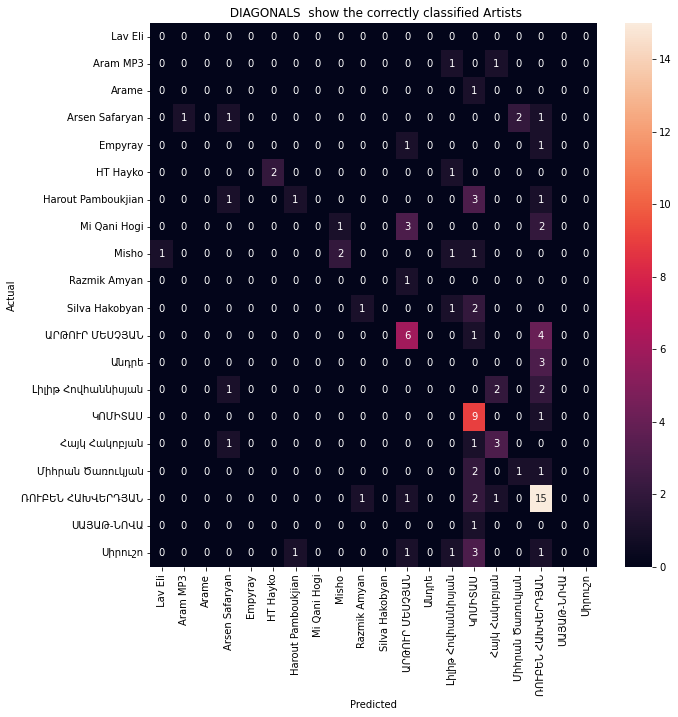

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



y_test_artist = encoder.inverse_transform(y_test)
y_pred_artist = encoder.inverse_transform(y_pred)


conf_matrix = confusion_matrix(y_test_artist, y_pred_artist)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, fmt="d",
            xticklabels=encoder.classes_, 
            yticklabels=encoder.classes_)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title(" DIAGONALS  show the correctly classified Artists with RandomForrestClassifier")
plt.show()